In [6]:
from copy import deepcopy
import matplotlib.pyplot as plt

In [7]:
# exmaple 1
original_tubes = [
          ['p','b','r','p'],
          ['y','g','g','r'],
          ['0']*4,  ['0']*4,
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
]

In [8]:
colrs = {'p':"pink", 'b':"blue", 'r':"red", 'y':"yellow", 'g':"green"}

for tube in original_tubes:
  for i,colr in enumerate(tube):
    if colr != '0':
      tube[i] = colrs[colr]

In [9]:
def plot_tubes(tubes):
  n_plots = len(tubes)//5 + 1
  fig, axs = plt.subplots(1,n_plots, figsize=(10,3))

  for ax in axs:
    ax.set_xlim([-0.5,4.5])

  for i,tube in enumerate(tubes):
    for j,colr in enumerate(reversed(tube)):
      if colr != '0':
        axs[i//5].bar(str(i+1), 1, bottom=j, color=colr, width=0.5, edgecolor='k')
      else:
        axs[i//5].bar(str(i+1), 1, bottom=j, fc=[1,1,1,0], width=0.5, edgecolor='k')
  plt.show()      

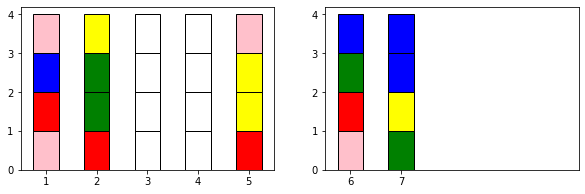

In [10]:
plot_tubes(original_tubes)

In [11]:
def nonEmptyIndex(tube):
  i=0
  while i in range(len(tube)):
    if tube[i] != '0':
      break
    i+=1  
  return i

In [12]:
def transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)
  if t2_indx < len(tube2):  # if tube not empty
    if tube1[t1_indx] != tube2[t2_indx]:  # check if color matches
      return None, None
  else:   # if tube empty
    if allSame([tube1]):  # if all same
      return None, None

  # calc chunk size  
  colr = tube1[t1_indx]
  j = t1_indx + 1
  while j in range(len(tube1)):
    if tube1[j] != colr:
      break
    j+=1
  chunk_size = j - t1_indx
  
  if chunk_size <= nonEmptyIndex(tube2):  # check if tube2 can hold chunk
    for k in range(chunk_size):
      #print(tube2[j-k-1])
      tube2[t2_indx - k - 1] = tube1[t1_indx + k]
      tube1[t1_indx + k] = '0'
  else:
    return None, None

  return tube1,tube2

In [13]:
def allSame(tubes):
  same = True
  colrs = []
  for tube in tubes:
    t_indx = nonEmptyIndex(tube)
    if t_indx == len(tube):  # all same if tube empty
      continue

    colr1 = tube[t_indx]
    colrs.append(colr1)
    t_indx += 1
    while t_indx in range(len(tube)):
      if tube[t_indx] != colr1:
        return False
      t_indx += 1

  if len(colrs) > len(set(colrs)):
    return False
  return same

In [22]:
def playGame(original_tubes, moves=None):
  tubes = deepcopy(original_tubes)

  move_indx = 0
  while True:
    plot_tubes(tubes)
    if allSame(tubes):
      break

    if moves is None:
      i = int(input("enter tube to transfer from: ")) - 1
      j = int(input("enter tube to transfer to: ")) - 1
    else:
      i = moves[move_indx][0]
      j = moves[move_indx][1]
      print("move:%d -> transfer tube%d to tube%d"%(move_indx+1,i+1,j+1))
    tube1, tube2 = tubes[i], tubes[j]

    transferred = False
    cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
    cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
    if cond_1 and cond_2:
      new_tubes = deepcopy(tubes)
      new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
      if new_tube1 is not None:          
          new_tubes[i], new_tubes[j] = new_tube1, new_tube2
          move_indx += 1
          #print(new_tubes)
          transferred = True
          tubes = new_tubes
    if not transferred:
      print("invalid move")

### play manually

In [ ]:
playGame(original_tubes)

### use solver

In [20]:
import ColorSort_solver

run 0, max_moves = 1


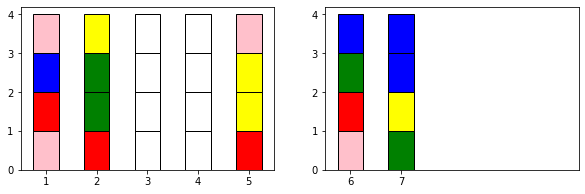

move:1 -> transfer tube1 to tube3


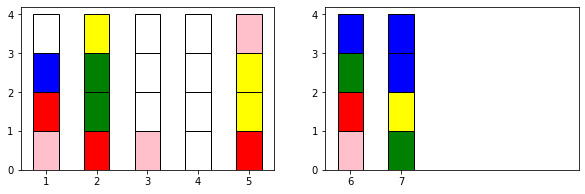

move:2 -> transfer tube1 to tube4


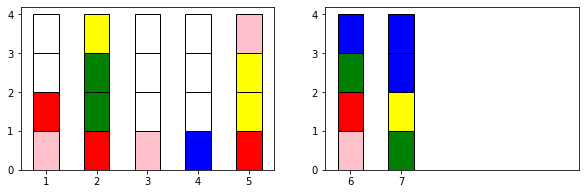

move:3 -> transfer tube5 to tube3


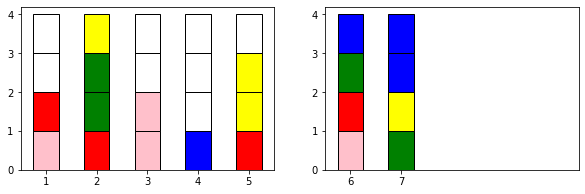

move:4 -> transfer tube2 to tube5


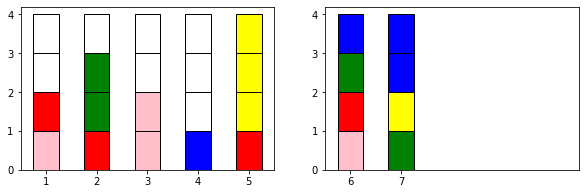

move:5 -> transfer tube6 to tube4


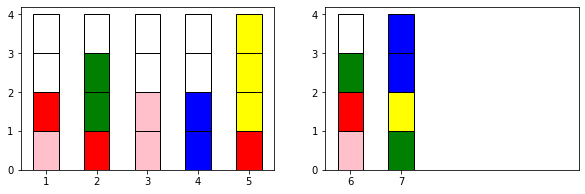

move:6 -> transfer tube6 to tube2


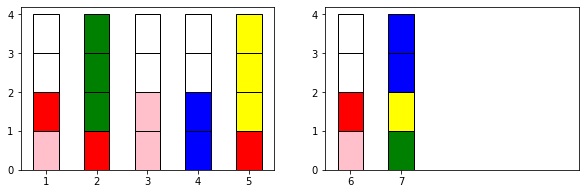

move:7 -> transfer tube1 to tube6


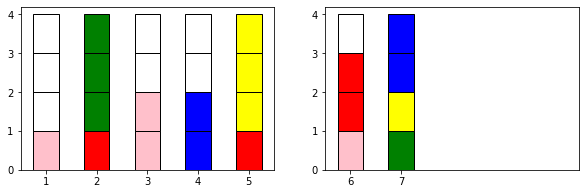

move:8 -> transfer tube1 to tube3


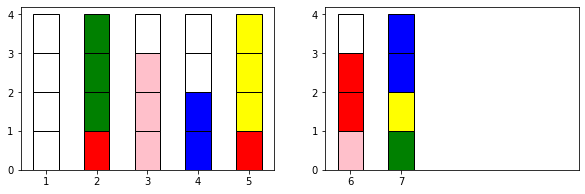

move:9 -> transfer tube2 to tube1


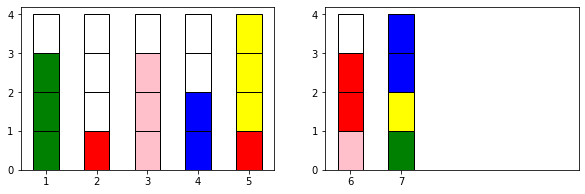

move:10 -> transfer tube2 to tube6


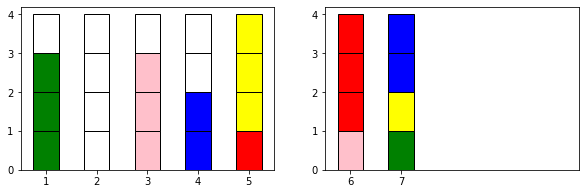

move:11 -> transfer tube5 to tube2


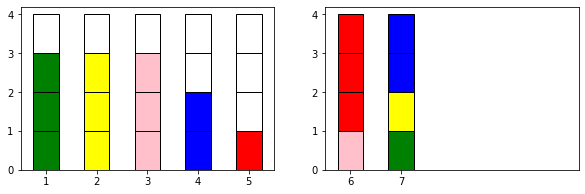

move:12 -> transfer tube7 to tube4


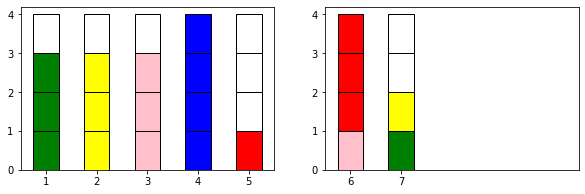

move:13 -> transfer tube7 to tube2


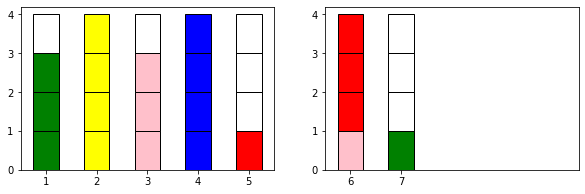

move:14 -> transfer tube1 to tube7


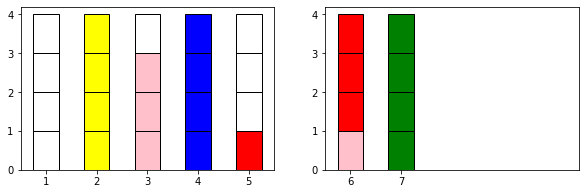

move:15 -> transfer tube6 to tube1


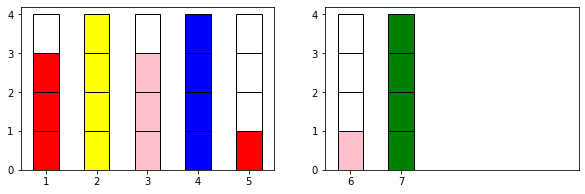

move:16 -> transfer tube1 to tube5


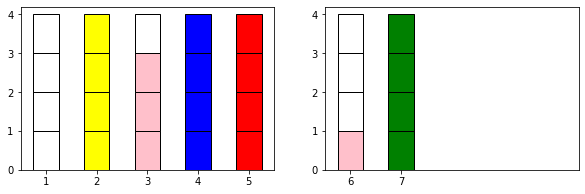

move:17 -> transfer tube3 to tube6


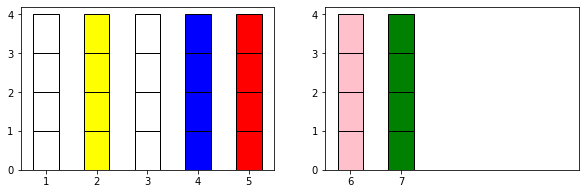

In [23]:
moves = ColorSort_solver.seq_backtrack(original_tubes)
playGame(original_tubes, moves)